In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [33]:
df = pd.read_csv('legs.csv')

In [4]:
df[df['class']=='stand']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,stand,0.012217,-0.638231,-0.324538,0.999980,0.020365,-0.677070,-0.310707,0.999906,0.020843,...,0.246212,0.917545,0.173175,0.859333,0.099646,0.989794,-0.116490,0.842062,0.130974,0.988211
1,stand,0.014851,-0.637456,-0.324044,0.999980,0.022914,-0.676328,-0.309874,0.999907,0.023368,...,0.241753,0.917908,0.172711,0.857226,0.097270,0.989746,-0.112110,0.838432,0.127341,0.988326
2,stand,0.015727,-0.637597,-0.317547,0.999980,0.023644,-0.676457,-0.302616,0.999907,0.024088,...,0.242016,0.918409,0.172551,0.854935,0.096978,0.989704,-0.109109,0.833864,0.128139,0.988399
3,stand,0.018262,-0.637455,-0.317715,0.999980,0.026134,-0.676299,-0.302812,0.999910,0.026563,...,0.234711,0.918293,0.172826,0.854273,0.103906,0.989625,-0.104208,0.833025,0.119180,0.988456
4,stand,0.018596,-0.637452,-0.317599,0.999980,0.026473,-0.676293,-0.302697,0.999910,0.026901,...,0.232597,0.918745,0.174454,0.853842,0.104610,0.989536,-0.104529,0.829920,0.117071,0.988498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,stand,-0.028900,-0.638825,-0.309612,0.999913,-0.023274,-0.676729,-0.293079,0.999778,-0.022876,...,0.159964,0.909579,0.273331,0.874425,-0.015294,0.986352,-0.061732,0.862606,0.043451,0.987256
292,stand,-0.028888,-0.638626,-0.306719,0.999920,-0.023118,-0.676466,-0.290163,0.999793,-0.022718,...,0.161015,0.911327,0.262485,0.874150,-0.015801,0.986642,-0.099598,0.858202,0.044273,0.987658
293,stand,-0.017261,-0.630772,-0.316344,0.999925,-0.009346,-0.668633,-0.301420,0.999800,-0.008954,...,0.150340,0.913346,0.216187,0.873189,-0.013836,0.985918,-0.165453,0.850411,0.028445,0.987657
294,stand,-0.014920,-0.622800,-0.346654,0.999929,-0.006863,-0.660703,-0.333004,0.999804,-0.006460,...,0.148626,0.916204,0.194715,0.873248,-0.004978,0.985849,-0.180199,0.846906,0.027288,0.987892


In [5]:
df[df['class']=='bending']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
3424,bending,-0.310568,0.087651,-0.505121,0.994359,-0.326556,0.064869,-0.526721,0.992308,-0.326871,...,0.057062,0.684995,-0.089660,0.757178,-0.181728,0.971431,-0.199522,0.762619,-0.001143,0.810278
3425,bending,-0.316740,0.085148,-0.506538,0.994892,-0.330331,0.062896,-0.526929,0.993039,-0.330653,...,0.101942,0.676119,-0.060083,0.773155,-0.100832,0.971962,-0.255943,0.813603,0.065464,0.801193
3426,bending,-0.316588,0.071390,-0.513004,0.995332,-0.330128,0.046228,-0.529563,0.993647,-0.330446,...,0.092492,0.672774,-0.080598,0.785848,-0.131621,0.972663,-0.255744,0.828001,0.048955,0.799793
3427,bending,-0.294874,-0.003456,-0.575882,0.995772,-0.295515,-0.028569,-0.579367,0.994242,-0.295899,...,0.070744,0.678812,-0.078407,0.793355,-0.132664,0.973990,-0.244617,0.830651,0.015355,0.806018
3428,bending,-0.248313,-0.050831,-0.611708,0.996178,-0.240081,-0.074794,-0.613475,0.994792,-0.240446,...,-0.012132,0.696565,-0.068039,0.784479,-0.158717,0.975480,-0.205975,0.821459,-0.079359,0.818000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4237,bending,-0.133816,-0.399301,-0.549095,0.999408,-0.133271,-0.440116,-0.545958,0.999067,-0.132941,...,0.060148,0.862683,0.053324,0.875347,-0.148925,0.935880,-0.122983,0.861229,-0.051044,0.972469
4238,bending,-0.136082,-0.398577,-0.551291,0.999454,-0.135696,-0.439569,-0.548432,0.999126,-0.135352,...,0.056015,0.863041,0.059089,0.874253,-0.145636,0.940157,-0.123283,0.859626,-0.058996,0.972483
4239,bending,-0.117375,-0.410731,-0.545541,0.999500,-0.114794,-0.448133,-0.541309,0.999190,-0.114443,...,0.049335,0.860852,0.077257,0.865373,-0.168246,0.943802,-0.118296,0.854944,-0.067037,0.971696
4240,bending,-0.109917,-0.506846,-0.496622,0.999544,-0.113603,-0.541264,-0.485248,0.999253,-0.113120,...,0.039096,0.860280,0.103330,0.854834,-0.184697,0.947387,-0.116825,0.843819,-0.073668,0.971592


In [34]:
X = df.drop('class', axis=1) # features: 동작 이름을 제외한 모든 항목
y = df['class'] # target value

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [36]:
y_test

40     1
44     1
260    3
188    3
320    4
      ..
167    2
220    3
283    4
225    3
266    4
Name: class, Length: 120, dtype: int64

In [37]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [38]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

In [40]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(max_iter=1000))]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [41]:
fit_models['lr'].predict(X_test)

array([1, 1, 3, 3, 4, 4, 1, 4, 1, 4, 3, 1, 1, 3, 1, 1, 2, 5, 5, 1, 1, 2,
       4, 3, 1, 3, 3, 3, 2, 1, 4, 2, 1, 1, 3, 5, 2, 4, 5, 1, 3, 1, 5, 4,
       1, 4, 1, 2, 1, 2, 4, 1, 3, 4, 1, 4, 5, 5, 5, 3, 2, 1, 3, 1, 1, 4,
       3, 5, 1, 4, 4, 1, 5, 1, 1, 1, 5, 1, 5, 3, 1, 1, 3, 5, 1, 2, 2, 5,
       5, 3, 3, 2, 3, 5, 4, 1, 1, 2, 5, 2, 3, 4, 5, 5, 2, 1, 3, 5, 3, 4,
       3, 2, 2, 2, 3, 2, 3, 4, 3, 4], dtype=int64)

## Evaluating the Models

In [42]:
from sklearn.metrics import accuracy_score # Accuracy metrics 
import pickle 

In [43]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))

lr 1.0
rc 1.0
rf 1.0
gb 0.95


In [44]:
y_test

40     1
44     1
260    3
188    3
320    4
      ..
167    2
220    3
283    4
225    3
266    4
Name: class, Length: 120, dtype: int64

In [45]:
with open('legs.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)

In [18]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of ticklabels (9).

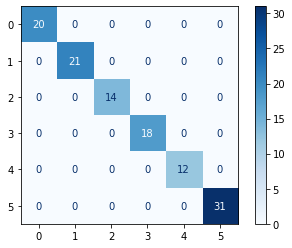

In [19]:
label=['stand', 'sit_chair', 'sit_floor', 'working_overhead', 'kneeling', 'squatting', 'bending_foward', 'arm_up1', 'arm_up2'] # 라벨 설정
plot = plot_confusion_matrix(fit_models['rf'], # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')